# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action = 'ignore')

# Reading Dataset

In [4]:
df = pd.read_csv('train.csv')

In [ ]:
# Performing EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='label', ylabel='count'>

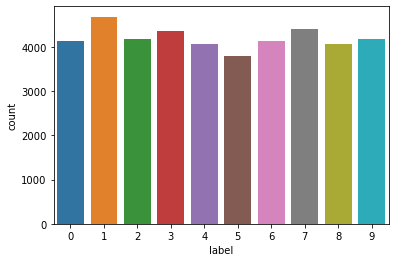

In [5]:
sns.countplot(df['label'])

In [6]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [9]:
type(x)

numpy.ndarray

In [10]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

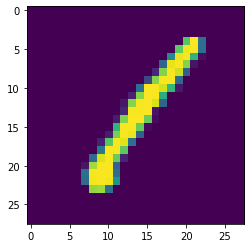

In [12]:
plt.imshow(x[0].reshape(28,28))

In [13]:
y[0]

1

The label of the image is  1


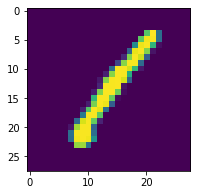

The label of the image is  0


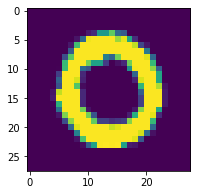

The label of the image is  1


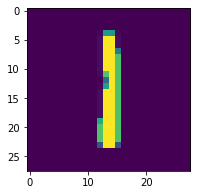

The label of the image is  4


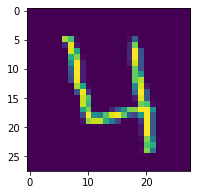

The label of the image is  0


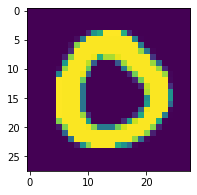

In [14]:
for i in range(0,5):
    plt.figure(figsize = (3,3))
    print('The label of the image is ',y[i])
    plt.imshow(x[i].reshape(28,28))
    plt.show()

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state=100)

In [16]:
x_train.shape

(33600, 784)

In [17]:
y_train.shape

(33600,)

# Feature Scalling (Normalization)

In [19]:
x_train = x_train/255
x_test = x_test/255

# Creating Artificial Neural Network

In [21]:
# Importing Libraries

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN

In [24]:
ann_clf = Sequential()

# Adding the input layer and first hidden layer

In [26]:
ann_clf.add(Dense(activation='relu',input_dim = 784, units = 128, kernel_initializer = 'uniform'))

# Output layer 

In [28]:
ann_clf.add(Dense(activation= 'softmax', units = 10, kernel_initializer = 'uniform'))

In [29]:
ann_clf.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Model summary

In [31]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [33]:
history = ann_clf.fit(x_train,y_train,validation_split=0.33, batch_size = 32, epochs = 20)

Epoch 1/20
704/704 [==============================] - 5s 3ms/step - loss: 0.4588 - accuracy: 0.8727 - val_loss: 0.2667 - val_accuracy: 0.9235
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.2138 - accuracy: 0.9381 - val_loss: 0.1868 - val_accuracy: 0.9439
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.1517 - accuracy: 0.9566 - val_loss: 0.1563 - val_accuracy: 0.9513
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.1150 - accuracy: 0.9659 - val_loss: 0.1415 - val_accuracy: 0.9548
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0888 - accuracy: 0.9745 - val_loss: 0.1252 - val_accuracy: 0.9614
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.9812 - val_loss: 0.1267 - val_accuracy: 0.9610
Epoch 7/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.1209 - val_accuracy: 0.9655
Epoch 

In [34]:
y_pred = ann_clf.predict(x_test)

263/263 [==============================] - 0s 1ms/step


In [35]:
y_pred

array([[3.2567307e-10, 7.9909614e-13, 4.5821317e-13, ..., 1.9043662e-16,
        1.8124086e-10, 1.6315112e-13],
       [1.0000000e+00, 5.6622225e-18, 5.1588135e-12, ..., 6.7871293e-14,
        4.9004371e-16, 4.5522895e-12],
       [1.7667948e-17, 1.6161409e-12, 1.0000000e+00, ..., 1.1756289e-13,
        7.6016500e-09, 5.4275311e-19],
       ...,
       [1.6819184e-16, 1.5336850e-15, 9.6355194e-13, ..., 8.9933785e-09,
        1.0000000e+00, 1.7313978e-08],
       [2.0796124e-14, 1.8280585e-10, 5.8725202e-08, ..., 9.9999952e-01,
        1.4405030e-10, 6.7364361e-08],
       [3.2477503e-11, 7.4787029e-15, 2.4527027e-09, ..., 8.5626807e-06,
        2.1104949e-08, 9.9997067e-01]], dtype=float32)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
a = np.array([27,98,100,20,10])

In [38]:
type(a)

numpy.ndarray

In [39]:
a.argmax()

2

In [40]:
y_pred = y_pred.argmax(axis = 1)

In [41]:
y_pred

array([5, 0, 2, ..., 8, 7, 9], dtype=int64)

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[835,   0,   0,   0,   0,   2,   3,   1,   1,   3],
       [  0, 904,   4,   1,   2,   0,   0,   2,   4,   3],
       [  4,   2, 774,   2,   1,   1,   1,   6,   7,   3],
       [  2,   0,   8, 761,   2,  20,   0,   4,   9,  17],
       [  1,   2,   1,   1, 763,   1,   3,   2,   1,  20],
       [  1,   4,   2,   4,   4, 764,   3,   0,  12,  13],
       [  2,   2,   0,   0,   3,   3, 826,   0,   4,   0],
       [  1,   4,   7,   0,   3,   2,   1, 838,   0,  13],
       [  2,   6,   3,   3,   6,   5,   4,   1, 801,  12],
       [  3,   0,   0,   1,   6,   1,   0,   5,   4, 837]], dtype=int64)

In [43]:
acc = accuracy_score(y_test,y_pred)

In [44]:
acc

0.9646428571428571

In [45]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       845
           1       0.98      0.98      0.98       920
           2       0.97      0.97      0.97       801
           3       0.98      0.92      0.95       823
           4       0.97      0.96      0.96       795
           5       0.96      0.95      0.95       807
           6       0.98      0.98      0.98       840
           7       0.98      0.96      0.97       869
           8       0.95      0.95      0.95       843
           9       0.91      0.98      0.94       857

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



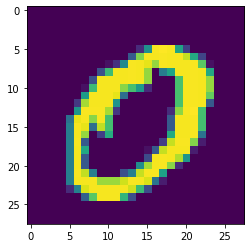

In [46]:
plt.imshow(x_test[910].reshape(28,28))

In [47]:
y_pred[910]

0

In [48]:
df1 = pd.read_csv('test.csv')

In [49]:
df1.shape

(28000, 784)

In [50]:
x1 = df1.iloc[2:3,:].values

In [51]:
x1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [52]:
x1.shape

(1, 784)

In [53]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [54]:
y_pred1 = ann_clf.predict(x1)

1/1 [==============================] - 0s 67ms/step


In [55]:
y_pred1 = y_pred1.argmax(axis=1)

In [56]:
y_pred1

array([9], dtype=int64)

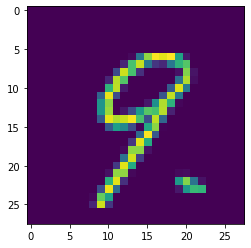

In [57]:
plt.imshow(x1.reshape(28,28))

# ploting train and test loss 

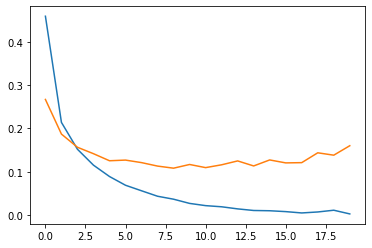

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# ploting train and test accuracy

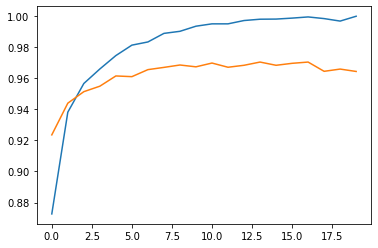

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])